# Subgraph Problem

One of the fundamental problems of graph theory and computer science is the problem of counting the number of times a given subgraph appears within a larger parent graph. This problem can now be cast as a machine learning problem.

Give a graph $G=(V,E)$, either: (the definition used depends on the domain of study)
1. $G'$ is a subgraph of $G$ (node) *induced* by $V'$, where $G'=(V',E')$ such that $V'\subseteq V$ and $E'=\{(u,v)\in E | u,v\in V'\}$
2. $G'$ is a subgraph of $G$ (edge) *induced* by $E'$, where $G'=(V',E')$ such that $E'\subseteq E$ and $V'=\{v\in V | (v,u)\in E'\}$

Further, as these definitions require the subgraph to be taken from the original parent, *isomorphism* (whether graphs are identical - graph isomorphism has not been proven to be an NP-hard problem but no polynomial algorithm has been found) needs to be defined such that an un-related sugraph can be defined for a parent. $G_1=(V_1,E_1)$ amd $G_2=(V_2,E_2)$ are *isomorphic* if there exists a bijection (one-to-one) $f:V_1\rightarrow V_2$ such that $(u,v)\in E_1 \leftrightarrow (f(u),f(v))\in E_2$ ($f$ is called the *isomorphism*). Therefore, $G_2$ is *subgraph-isomorphic* (known to be NP-hard) to $G_1$ if some subgraph of $G_2$ is *isomorphic* to $G_1$ (commonly say $G_1$ is a subgraph of $G_2$)

***Network Motifs*** are recurring (high frequency), significant (more frequent than expected) patterns (small subgraphs) of interconnections. *Network Motifs* are important as they help in teh understanding of how the graph dataset works (e.g. feed-forward loops motifs found in networks of neurons were found to be used for neutralising "biological noise", etc.) and are a useful tool to make predictions based on their (lack of) presence in the dataset.

Subgraph frequency is defined by the number of nodes $u$ in $G_T$ for which some subgraph of $G_T$ is isomorphic to $G_Q$ and the isomorphism maps node $u$ to $v$. Let $(G_Q,v)$ be called a *node-anchored* subgraph (robust to outliers). Thus, is a subgraphs occurs in a real network more often than in a **random network** it is considered to have functional significance:
- **Erdos-Renyi Random Graphs**: $G_{n,p}$ is an undirected graph on $n$ nodes where each edge $(u,v)$ appears independent and identically distributed with probability $p$.
- **Configuration Model**: $G^{rand}$ is a random graph with given degree sequence $k_1,\ldots,k_N$; generated by creating for each node $i$, $k_i$ mini-nodes and randomly connecting these mini-nodes (no self-loops), afterwhich coalescing back the mini-nodes, retaining their connections within the parent node (coalesce similar connections).

And so to determine is *motifs* are overrepresented in a network can be done by statistical measures (z-score, etc.) to evaluate how significant is the difference between the *motif* count in the real graph vs the random graph with similar statistics (node number, edges, degree sequence, etc.) for each *motif*.

## Isomorphism as an ML task

Instead of combinatorial matching to identify whether the graph and subgraph are isomorphic, a GNN can be used to predict subgraph isomorphism (binary prediction). The high level approach can be to decompose the input graph into neighbourhoods and embed each such that a prediction can be made against them with the embeddings of the query subgraph. To make this robust (similar to the subgraph frequencies), node-anchored definitions will be utilised; therefore will allow  isomorphism detection as well as identify the corresponding nodes.

Breadth-first search can be used to obtain $k$-hop neighbourhood around any given anchor-node (hyperparameter $k$) for both $G_T$ and $G_Q$, with the embedding being done using GNN.

The embedding space will be such that a graph $A$ is mapped to a point $Z_A\geq 0$ (non-negative in all dimensions); so that it can capture the partial ordering (transitivity) $A \preceq B$ and $B \preceq C$, then $A \preceq C$ ($x \preceq y$ denotes that the emebdding of $x$ is less than or equal to $y$ in all of its coordinates). Subgraph isomorphism relationship can be nicely encoded in this order embedding space: (subgraph embedding being at the lower-left of a neighbourhood embedding which includes the given subgraph)
- **Transitivity**: if $G_1$ is a subgraph of $G_2$, and $G_2$ is a subgraph of $G_3$, then $G_1$ is a subgraph of $G_3$ ($A \preceq B \cap B \preceq C \rightarrow A \preceq C$).
- **Anti-Symmetry**: if $G_1$ is a subgraph of $G_2$, and $G_2$ is a subgraph of $G_1$, then $G_1$ is isomorphic to $G_2$ ($A \preceq B \cap B \preceq A \rightarrow A = B$).
- **Closure Under Intersection**: the trivial graph of 1 node is a subgraph of any graph ($0 \preceq X,\;\forall X$).

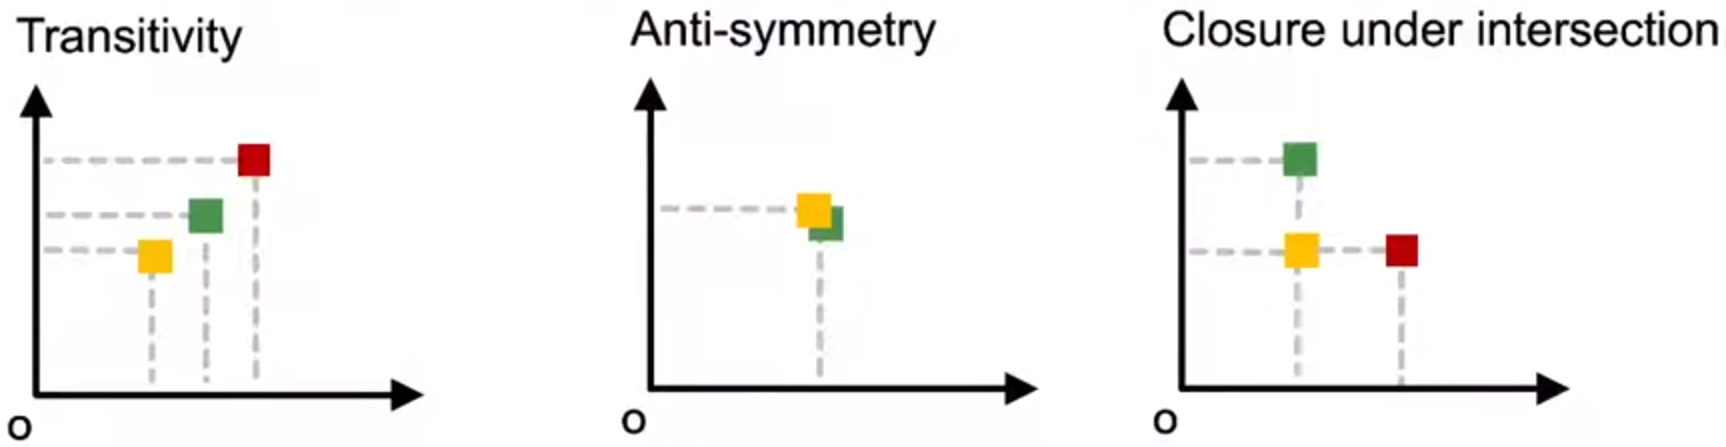